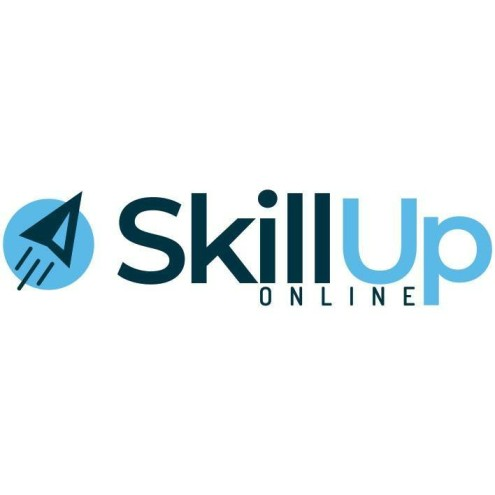

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importación de las bibliotecas necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Importación y organización del dataset

In [3]:
import pandas as pd
dataframe= pd.read_csv(r'C:\Users\\gioco\Downloads\creditcard.csv\creditcard.csv')

### Limpieza de  datos

a. Valores perdidos

In [3]:
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


b. Datos duplicados

In [4]:
filas_duplicadas = dataframe.duplicated().sum()
print("Número de filas duplicadas:", filas_duplicadas)
# Eliminación de las filas duplicadas
data_sin_duplicados = dataframe.drop_duplicates()
print("Dataframe sin filas duplicadas:")
print(data_sin_duplicados.head())
# Verificación existencia de filas duplicadas
filas_duplicadas_restantes = data_sin_duplicados.duplicated().sum()
print("Número de filas duplicadas restantes:", filas_duplicadas_restantes)

Número de filas duplicadas: 1081
Dataframe sin filas duplicadas:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -

### Análisis los datos

Porcentaje de transacciones fraudulentas del dataset.

In [5]:
# Cantidad de transacciones fraudulentas
transacciones_fraudulentas = dataframe['Class'].sum()

# Número total de transacciones
total_transacciones = len(dataframe)

# Porcentaje de transacciones fraudulentas
porcentaje_fraudulentas = (transacciones_fraudulentas / total_transacciones) * 100
print(f"El porcentaje de transacciones fraudulentas es: {porcentaje_fraudulentas:.4f}%")


El porcentaje de transacciones fraudulentas es: 0.1727%


Importe medio de las transacciones fraudulentas.



In [6]:
# Filtrar las transacciones fraudulentas
transacciones_fraudulentas = dataframe[dataframe['Class'] == 1]

# Calcula el importe medio de las transacciones fraudulentas
importe_medio_fraudulentas = transacciones_fraudulentas['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"El importe medio de las transacciones fraudulentas es: {importe_medio_fraudulentas:.2f}")



El importe medio de las transacciones fraudulentas es: 122.21


### Visualiza los datos


Cantidad de transacciones fraudulentas en comparación con las no fraudulentas.

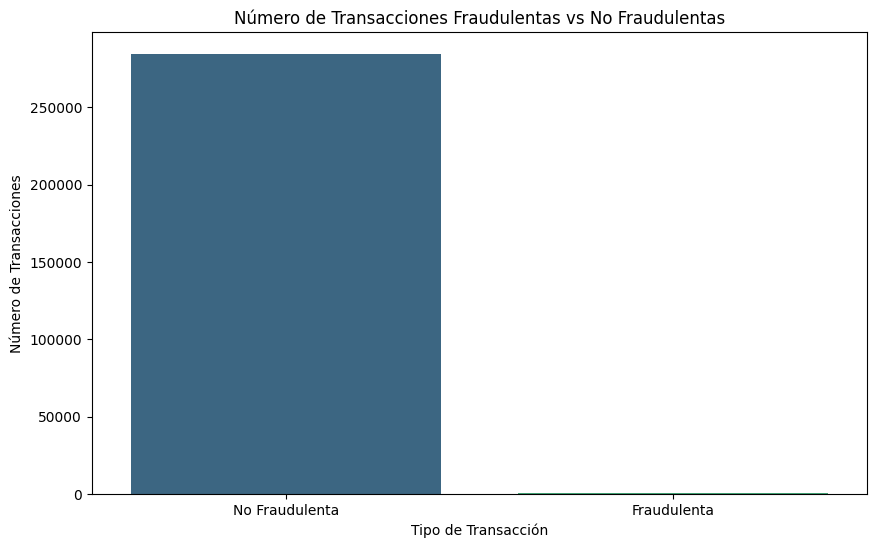

In [7]:
# Se cuentan el número de transacciones fraudulentas y no fraudulentes
# Se muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
conteo_transacciones = dataframe['Class'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_transacciones.index, y=conteo_transacciones.values, palette='viridis')
# Adición de título y etiquetas
plt.title('Número de Transacciones Fraudulentas vs No Fraudulentas')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Número de Transacciones')
plt.xticks(ticks=[0, 1], labels=['No Fraudulenta', 'Fraudulenta'])
plt.show()



Distribución de los importes de las transacciones fraudulentas.


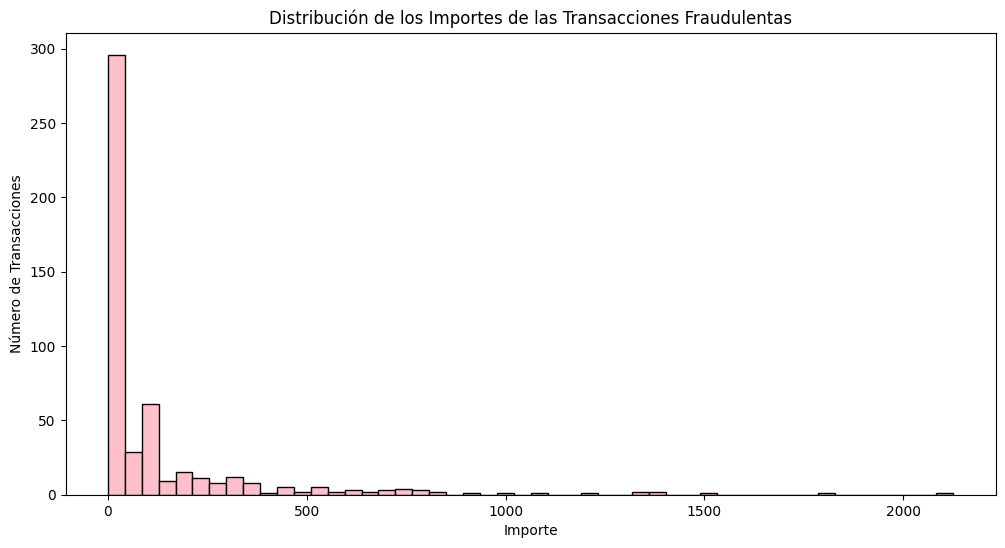

In [4]:
# Separación de los datos de transacciones fraudulentas
transacciones_fraudulentas = dataframe[dataframe['Class'] == 1]
# Se muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(12, 6))
plt.hist(transacciones_fraudulentas['Amount'], bins=50, color='pink', edgecolor='black')

# Incorporación de título y etiquetas
plt.title('Distribución de los Importes de las Transacciones Fraudulentas')
plt.xlabel('Importe')
plt.ylabel('Número de Transacciones')

# Se muestra el gráfico
plt.show()


## Desarrollo y evaluación de modelos

### Separación del dataset

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
dataframe= pd.read_csv(r'C:\Users\\gioco\Downloads\creditcard.csv\creditcard.csv')

# Creación de un DataFrame X con todas las columnas excepto la columna 'Class'.
X = dataframe.drop(columns=['Class'])

# Creación de una Serie y con solo la columna 'Class'
y = dataframe['Class']

# Separación de los datos en conjuntos de entrenamiento y evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Muestra del tamaño de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTamaño del conjunto de evaluación:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
# Creación de un DataFrame X con todas las columnas excepto la columna 'Class'
X = dataframe.drop(columns=['Class'])

# Creación de una Serie y con solo la columna 'Class'
y = dataframe['Class']

# Separación de los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Muestra del tamaño de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTamaño del conjunto de evaluación:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape) 

Tamaño del conjunto de entrenamiento:
X_train: (227845, 30)
y_train: (227845,)

Tamaño del conjunto de evaluación:
X_test: (56962, 30)
y_test: (56962,)
Tamaño del conjunto de entrenamiento:
X_train: (227845, 30)
y_train: (227845,)

Tamaño del conjunto de evaluación:
X_test: (56962, 30)
y_test: (56962,)


### Creación y evaluación de los modelos

In [10]:
# Se importan las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Creación de una instancia del clasificador RandomForest
modelo_rf = RandomForestClassifier(max_depth=150, random_state=42)

# Entrenamiento del modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

# Predicciones sobre los datos de evaluación
y_pred = modelo_rf.predict(X_test)

# Se muestra el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

# Cálculo de la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%") 

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Exactitud del modelo: 99.96%
